In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
import os,imageio
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
import datetime,matplotlib,time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
#from gifly import gif_maker
import shapefile   # Requires the pyshp package
import glob

In [19]:
# conversion from polar stereographic NSIDC grid to geographical coordinates
# code from https://github.com/nsidc/polar_stereo provided by NSIDC
# https://nsidc.org/data/polar-stereo/ps_grids.html
def polar_xy_to_lonlat(x, y, true_scale_lat, re, e, hemisphere):
    """Convert from Polar Stereographic (x, y) coordinates to
    geodetic longitude and latitude.
    Args:
        x (float): X coordinate(s) in km
        y (float): Y coordinate(s) in km
        true_scale_lat (float): true-scale latitude in degrees
        hemisphere (1 or -1): 1 for Northern hemisphere, -1 for Southern
        re (float): Earth radius in km
        e (float): Earth eccentricity
    Returns:
        If x and y are scalars then the result is a
        two-element list containing [longitude, latitude].
        If x and y are numpy arrays then the result will be a two-element
        list where the first element is a numpy array containing
        the longitudes and the second element is a numpy array containing
        the latitudes.
    """

    e2 = e * e
    slat = true_scale_lat * np.pi / 180
    rho = np.sqrt(x ** 2 + y ** 2)
    
    if abs(true_scale_lat - 90.) < 1e-5:
        t = rho * np.sqrt((1 + e) ** (1 + e) * (1 - e) ** (1 - e)) / (2 * re)
    else:
        cm = np.cos(slat) / np.sqrt(1 - e2 * (np.sin(slat) ** 2))
        t = np.tan((np.pi / 4) - (slat / 2)) / \
            ((1 - e * np.sin(slat)) / (1 + e * np.sin(slat))) ** (e / 2)
        t = rho * t / (re * cm) 

    chi = (np.pi / 2) - 2 * np.arctan(t)
    lat = chi + \
        ((e2 / 2) + (5 * e2 ** 2 / 24) + (e2 ** 3 / 12)) * np.sin(2 * chi) + \
        ((7 * e2 ** 2 / 48) + (29 * e2 ** 3 / 240)) * np.sin(4 * chi) + \
        (7 * e2 ** 3 / 120) * np.sin(6 * chi)
    lat = hemisphere * lat * 180 / np.pi
    lon = np.arctan2(hemisphere * x, -hemisphere * y)
    lon = hemisphere * lon * 180 / np.pi
    lon = lon + np.less(lon, 0) * 360
    if hemisphere == 1:
        lon = lon-45
    else:
        lon = lon#-180
    
    return [lon, lat]


In [20]:
# https://github.com/makerportal/gifly
def gif_maker(gif_name,png_dir,gif_indx,num_gifs,dpi=90):
    # make png path if it doesn't exist already
    if not os.path.exists(png_dir):
        os.makedirs(png_dir)

    # save each .png for GIF
    # lower dpi gives a smaller, grainier GIF; higher dpi gives larger, clearer GIF
    plt.savefig(png_dir+'frame_'+str(gif_indx)+'_.png',dpi=dpi)
    plt.close('all') # comment this out if you're only updating the x,y data

    if gif_indx==num_gifs-1:
        # sort the .png files based on index used above
        images,image_file_names = [],[]
        for file_name in os.listdir(png_dir):
            if file_name.endswith('.png'):
                image_file_names.append(file_name)       
        sorted_files = sorted(image_file_names, key=lambda y: int(y.split('_')[1]))

        # define some GIF parameters
        
        frame_length = 0.3 # seconds between frames
        end_pause = 3 # seconds to stay on last frame
        # loop through files, join them to image array, and write to GIF called 'wind_turbine_dist.gif'
        for ii in range(0,len(sorted_files)):       
            file_path = os.path.join(png_dir, sorted_files[ii])
            if ii==len(sorted_files)-1:
                for jj in range(0,int(end_pause/frame_length)):
                    images.append(imageio.imread(file_path))
            else:
                images.append(imageio.imread(file_path))
        # the duration is the time spent on each image (1/duration is frame rate)
        imageio.mimsave(gif_name, images,'GIF',duration=frame_length)

In [21]:
# create a list of shapes
# data source: NSIDC
# ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/shapefiles/shp_extent
# ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/shapefiles/shp_extent

fp_inN = "./shapes/North/*polygon*"
fp_inS = "./shapes/South/*polygon*"
SHPSIE_N = sorted(glob.glob(fp_inN))
SHPSIE_S = sorted(glob.glob(fp_inS))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

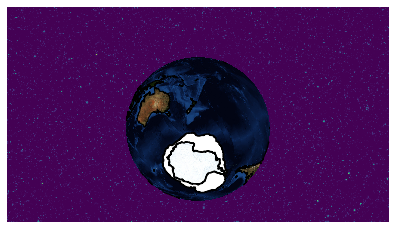

In [25]:
# adapted from https://makersportal.com/blog/2018/8/16/rotating-globe-in-python-using-basemap-toolkit
# star image from https://pixabay.com/photos/stars-space-night-cosmos-black-964022/
fig,ax0 = plt.subplots(figsize=(5.3,4))
ax0.set_position([0.0,0.0,1.0,1.0])

lat_viewing_angle = [60,60]
lon_viewing_angle = [-180,180]
rotation_steps = 150
lat_vec = np.linspace(lat_viewing_angle[0],lat_viewing_angle[0],rotation_steps)
lon_vec = np.linspace(lon_viewing_angle[0],lon_viewing_angle[1],rotation_steps)
gif_indx = 0
for pp in range(0,len(lat_vec)):

    m1 = Basemap(projection='ortho', 
              lat_0=lat_vec[0], lon_0=lon_vec[0],resolution=None)

    # add axis for space background effect
    galaxy_image = plt.imread('stars-964022_640.png')
    ax0.imshow(galaxy_image)
    ax0.set_axis_off()
    ax1 = fig.add_axes([0.25,0.2,0.5,0.5])

    # define map coordinates from full-scale globe
    map_coords_xy = [m1.llcrnrx,m1.llcrnry,m1.urcrnrx,m1.urcrnry]
    map_coords_geo = [m1.llcrnrlat,m1.llcrnrlon,m1.urcrnrlat,m1.urcrnrlon]

    #zoom proportion and re-plot map 
    zoom_prop = 2.0 # use 1.0 for full-scale map

    ax1.clear()
    ax1.set_axis_off()
    m = Basemap(projection='ortho',resolution='l',
              lat_0=lat_vec[pp],lon_0=lon_vec[pp],llcrnrx=-map_coords_xy[2]/zoom_prop,
                llcrnry=-map_coords_xy[3]/zoom_prop,urcrnrx=map_coords_xy[2]/zoom_prop,
                urcrnry=map_coords_xy[3]/zoom_prop)

    m.bluemarble(scale=0.5)
    m.drawcoastlines()

    datapathN = sorted(glob.glob(SHPSIE_N[gif_indx]+'/*.shp'))
    r = shapefile.Reader(datapathN[0])
    shapes = r.shapes()
    records = r.records()

    for record, shape in zip(records,shapes):
        lons,lats = zip(*shape.points)
        lons = np.array([i/1000 for i in lons])
        lats = np.array([i/1000 for i in lats])
        lon,lat = polar_xy_to_lonlat(lons,lats,70,6378.273,0.081816153,1)
        data = np.array(m(lon, lat)).T
    
        if len(shape.parts) == 1:
             segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])

        lines = LineCollection(segs,antialiaseds=(1,))
        lines.set_facecolors('w')
        lines.set_edgecolors('k')
            #lines.set_linewidth(0.1)
        ax1.add_collection(lines)
    plt.savefig('png_dir_bluemarble/'+'frame_'+"%3.3d"%gif_indx+'_.png')
    
    gif_indx+=1

print(gif_indx)
lat_viewing_angle = [60,-60]
lon_viewing_angle = [-180,180]
rotation_steps = 150
lat_vec = np.linspace(lat_viewing_angle[0],lat_viewing_angle[1],rotation_steps)
lon_vec = np.linspace(lon_viewing_angle[0],lon_viewing_angle[1],rotation_steps)

# Start rotating earth
for pp in range(0,len(lat_vec)):

    m1 = Basemap(projection='ortho', 
              lat_0=lat_vec[0], lon_0=lon_vec[0],resolution=None)

    # add axis for space background effect
    galaxy_image = plt.imread('stars-964022_640.png')
    ax0.imshow(galaxy_image)
    ax0.set_axis_off()
    ax1 = fig.add_axes([0.25,0.2,0.5,0.5])

    # define map coordinates from full-scale globe
    map_coords_xy = [m1.llcrnrx,m1.llcrnry,m1.urcrnrx,m1.urcrnry]
    map_coords_geo = [m1.llcrnrlat,m1.llcrnrlon,m1.urcrnrlat,m1.urcrnrlon]

    #zoom proportion and re-plot map 
    zoom_prop = 2.0 # use 1.0 for full-scale map

    ax1.clear()
    ax1.set_axis_off()
    m = Basemap(projection='ortho',resolution='l',
              lat_0=lat_vec[pp],lon_0=lon_vec[pp],llcrnrx=-map_coords_xy[2]/zoom_prop,
                llcrnry=-map_coords_xy[3]/zoom_prop,urcrnrx=map_coords_xy[2]/zoom_prop,
                urcrnry=map_coords_xy[3]/zoom_prop)

    m.bluemarble(scale=0.5)
    m.drawcoastlines()
    
    if gif_indx <= 225:
        #Northern Hemisphere
        datapathN = sorted(glob.glob(SHPSIE_N[gif_indx]+'/*.shp'))
        r = shapefile.Reader(datapathN[0])
        shapes = r.shapes()
        records = r.records()

        for record, shape in zip(records,shapes):
            lons,lats = zip(*shape.points)
            lons = np.array([i/1000 for i in lons])
            lats = np.array([i/1000 for i in lats])
            lon,lat = polar_xy_to_lonlat(lons,lats,70,6378.273,0.081816153,1)
            data = np.array(m(lon, lat)).T
    
            if len(shape.parts) == 1:
                 segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])

            lines = LineCollection(segs,antialiaseds=(1,))
            lines.set_facecolors('w')
            lines.set_edgecolors('k')
            #lines.set_linewidth(0.1)
            ax1.add_collection(lines)
    if gif_indx >= 255:
        #Southern Hemisphere
        datapathS = sorted(glob.glob(SHPSIE_S[gif_indx]+'/*.shp'))
        r = shapefile.Reader(datapathS[0])
        shapes = r.shapes()
        records = r.records()
  
        for record, shape in zip(records,shapes):
            lons,lats = zip(*shape.points)
            lons = np.array([i/1000 for i in lons])
            lats = np.array([i/1000 for i in lats])
            lon,lat = polar_xy_to_lonlat(lons,lats,70,6378.273,0.081816153,-1)
            data = np.array(m(lon, lat)).T
    
            if len(shape.parts) == 1:
                 segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])

            lines = LineCollection(segs,antialiaseds=(1,))
            lines.set_facecolors('w')
            lines.set_edgecolors('k')
            #lines.set_linewidth(0.1)
            ax1.add_collection(lines)
    plt.savefig('png_dir_bluemarble/'+'frame_'+"%3.3d"%gif_indx+'_.png')
    
    gif_indx+=1    

print(gif_indx)
# Southern hemisohere only
lat_viewing_angle = [-60,-60]
lon_viewing_angle = [-180,180]
rotation_steps = 150
lat_vec = np.linspace(lat_viewing_angle[0],lat_viewing_angle[1],rotation_steps)
lon_vec = np.linspace(lon_viewing_angle[0],lon_viewing_angle[1],rotation_steps)

for pp in range(0,len(lat_vec)):
#for pp in range(0,3):
    m1 = Basemap(projection='ortho', 
              lat_0=lat_vec[0], lon_0=lon_vec[0],resolution=None)

    # add axis for space background effect
    galaxy_image = plt.imread('stars-964022_640.png')
    ax0.imshow(galaxy_image)
    ax0.set_axis_off()
    ax1 = fig.add_axes([0.25,0.2,0.5,0.5])

    # define map coordinates from full-scale globe
    map_coords_xy = [m1.llcrnrx,m1.llcrnry,m1.urcrnrx,m1.urcrnry]
    map_coords_geo = [m1.llcrnrlat,m1.llcrnrlon,m1.urcrnrlat,m1.urcrnrlon]

    #zoom proportion and re-plot map 
    zoom_prop = 2.0 # use 1.0 for full-scale map

    ax1.clear()
    ax1.set_axis_off()
    m = Basemap(projection='ortho',resolution='l',
              lat_0=lat_vec[pp],lon_0=lon_vec[pp],llcrnrx=-map_coords_xy[2]/zoom_prop,
                llcrnry=-map_coords_xy[3]/zoom_prop,urcrnrx=map_coords_xy[2]/zoom_prop,
                urcrnry=map_coords_xy[3]/zoom_prop)

    m.bluemarble(scale=0.5)
    m.drawcoastlines()
    
    #Southern Hemisphere
    datapathS = sorted(glob.glob(SHPSIE_S[gif_indx]+'/*.shp'))
    r = shapefile.Reader(datapathS[0])
    shapes = r.shapes()
    records = r.records()

    for record, shape in zip(records,shapes):
        lons,lats = zip(*shape.points)
        lons = np.array([i/1000 for i in lons])
        lats = np.array([i/1000 for i in lats])
        lon,lat = polar_xy_to_lonlat(lons,lats,70,6378.273,0.081816153,-1)
        data = np.array(m(lon, lat)).T
    
        if len(shape.parts) == 1:
             segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])

        lines = LineCollection(segs,antialiaseds=(1,))
        lines.set_facecolors('w')
        lines.set_edgecolors('k')
            #lines.set_linewidth(0.1)
        ax1.add_collection(lines)
        
    plt.savefig('png_dir_bluemarble/'+'frame_'+"%3.3d"%gif_indx+'_.png')

    gif_indx+=1  


In [3]:
gif_name = 'Arctic_and_Antarctic_Monthly_SeaIceExtent_since_Nov1978.gif'
png_dir  = './png_dir_bluemarble/'
# sort the .png files based on index used above
images,image_file_names = [],[]
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        image_file_names.append(file_name)       
sorted_files = sorted(image_file_names, key=lambda y: int(y.split('_')[1]))

        # define some GIF parameters
        
frame_length = 0.1 # seconds between frames
end_pause = 2 # seconds to stay on last frame
        # loop through files, join them to image array, and write to GIF called 'wind_turbine_dist.gif'
for ii in range(0,len(sorted_files)):       
    file_path = os.path.join(png_dir, sorted_files[ii])
    if ii==len(sorted_files)-1:
        for jj in range(0,int(end_pause/frame_length)):
                images.append(imageio.imread(file_path))
    else:
        images.append(imageio.imread(file_path))
        # the duration is the time spent on each image (1/duration is frame rate)
imageio.mimsave(gif_name, images,'GIF',duration=frame_length)